In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile   as sf

In [134]:
def generateSin(freq, time, fs):
    n = time*fs #numero de pontos
    x = np.linspace(0.0, time, n)  # eixo do tempo
    s = np.sin(freq*x*2*np.pi)
    return (x, s)

In [135]:
def calcFFT(signal, fs):
    # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
    #y  = np.append(signal, np.zeros(len(signal)*fs))
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))

In [136]:
def LPF(signal, cutoff_hz, fs):
        from scipy import signal as sg
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 120.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))

In [137]:
fs  = 48000
T   = 4     
t   = np.linspace(-T/2,T/2,T*fs)

___
### Audio Original

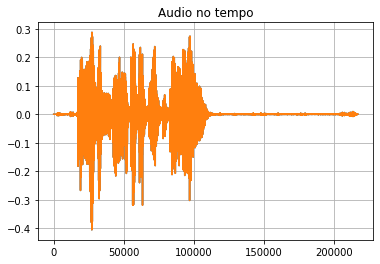

In [154]:
audio, samplerate = sf.read('sound.wav')
sd.play(audio,fs)
plt.figure() 
plt.grid()
plt.title('Audio no tempo')
plt.plot(audio)

(0, 25000)

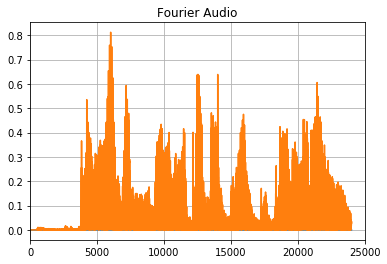

In [139]:
X, Y = calcFFT(audio, samplerate)
plt.figure("Fourier Audio")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Fourier Audio')
plt.xlim(0,25000)

___
### Audio normalizado: 

In [140]:
variavel = 1/np.min(audio)
audio_norm = audio*variavel

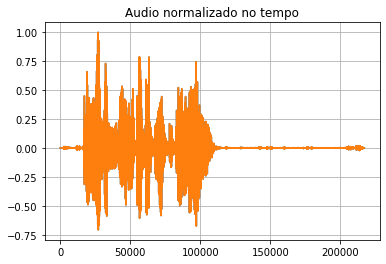

In [155]:
plt.figure() 
plt.plot(audio_norm)
plt.grid()
plt.title('Audio normalizado no tempo')
sd.play(audio_norm,fs)

(0, 25000)

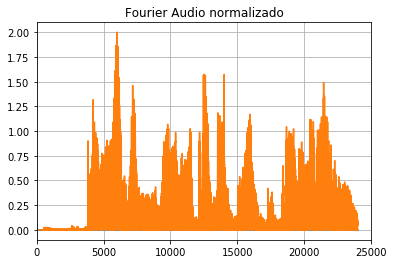

In [142]:
X, Y = calcFFT(audio_norm, samplerate)
plt.figure("Fourier Audio")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Fourier Audio normalizado')
plt.xlim(0,25000)

___
### Filtrando

filtrado


(40000, 160000)

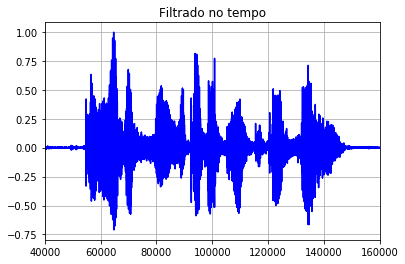

In [143]:
audioFiltrado = LPF(audio_norm[:,1], 4000, samplerate)
print("filtrado")
#sd.play(yFiltrado)
#sd.wait()
plt.plot(audioFiltrado, 'b')
plt.grid()
plt.title('Filtrado no tempo')
plt.xlim(40000,160000)

In [156]:
sd.play(audioFiltrado,fs)

(-7000, 7000)

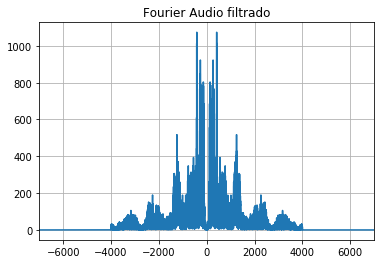

In [145]:
X, Y = calcFFT(audioFiltrado, samplerate)
plt.figure("Fourier Audio")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Fourier Audio filtrado')
plt.xlim(-7000,7000)

___
### Modulando AM

In [146]:
x0, y0 = generateSin(14000,6,samplerate)
y = y0[0:217088]
samplerate

48000

(0, 1000)

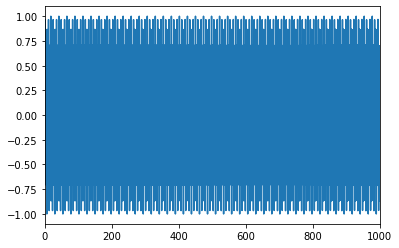

In [147]:
plt.figure() 
plt.plot(y0)
plt.xlim(0,1000)

In [152]:
moduled = audioFiltrado*y
sd.play(moduled)

Text(0.5, 1.0, 'Modulado no tempo')

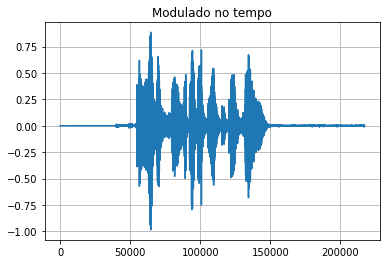

In [149]:
plt.figure() 
plt.plot(moduled)
plt.grid()
plt.title('Modulado no tempo')
# plt.xlim(0,1000)

48000

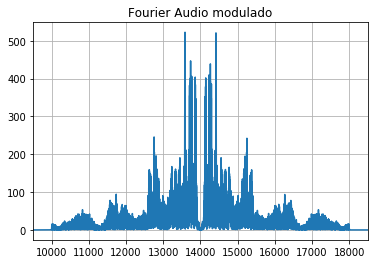

In [150]:
X, Y = calcFFT(moduled, samplerate)
plt.figure("Fourier Audio modulado")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Fourier Audio modulado')
plt.xlim(9500,18500)
samplerate

In [160]:
demoduled = moduled*y
sd.play(demoduled)

Text(0.5, 1.0, 'Demodulado no tempo')

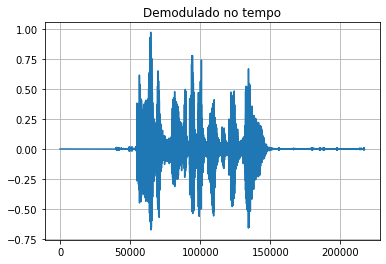

In [162]:
plt.figure() 
plt.plot(demoduled)
plt.grid()
plt.title('Demodulado no tempo')
# plt.xlim(0,1000)

(0, 28000)

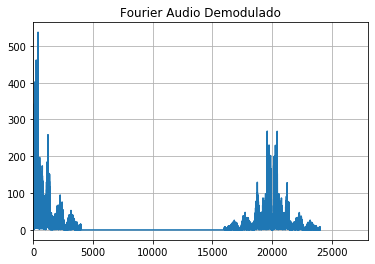

In [167]:
X, Y = calcFFT(demoduled, samplerate)
plt.figure("Fourier Audio modulado")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Fourier Audio Demodulado')
samplerate
plt.xlim(0,28000)